<table class="table table-bordered">
    <tr>
<!--         <th style="text-align:center; width:30%"><img src='https://drive.google.com/uc?export=view&id=1iEILhi-REsl4vk6cfd7yhNiTrAB-RVat' style="width: 100px; height: 80px; "></th> -->
        <th style="text-align:center;"><h3>Final Year Proect</h3><h3>Google Reviews Topic Modelling</h3><h4>LDA</h4></th>
    </tr>
</table>

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('./')

### 1. Reading the data and basic EDA

In [3]:
# Write your code below

# Solution
reviews = pd.read_csv (r'C:\Users\alext\OneDrive - Singapore Management University\Desktop\SMU General Shit\Y4S2 (FYP)\Project_2_SgCarMart Price Prediction\CarPricePrediction\Sentiment & Topic Modelling\getgo_reviews.csv')


In [4]:
display(reviews)

,Rating,Review Text,Review Date
0,5 stars,A great car sharing with many types of cars,a month ago
1,5 stars,GetGo always there when I need it. Very conven...,a month ago
2,5 stars,One of the best Car-Sharing company that I hav...,2 months ago
3,5 stars,Very convenient and easy rental with Getgo car...,a month ago
4,1 star,As a frequent GetGo customer,a month ago
...,...,...,...
945,5 stars,Plenty of cars to choose from nearby my area. ...,a month ago
946,5 stars,Convenience,a month ago
947,5 stars,I like the convenience of having at least one ...,2 years ago
948,5 stars,Renting is simple,2 months ago


In [15]:
reviews['Rating'] = reviews['Rating'].str[0]

# Convert 'Rating' column to numeric
reviews['Rating'] = pd.to_numeric(reviews['Rating'])

# Filter reviews with rating 4 stars or above
reviews_1star = reviews[reviews['Rating'] >= 4.0]


In [17]:
reviews.columns

Index(['Rating', 'Review Text', 'Review Date'], dtype='object')

In [18]:
#reviewRating is omitted
# Print out the first rows of papers
display(reviews_1star)

,Rating,Review Text,Review Date
0,5,A great car sharing with many types of cars,a month ago
1,5,GetGo always there when I need it. Very conven...,a month ago
2,5,One of the best Car-Sharing company that I hav...,2 months ago
3,5,Very convenient and easy rental with Getgo car...,a month ago
5,4,I was thrilled to drive an EV Hyundai Kona nea...,a month ago
...,...,...,...
943,5,good app for car sharing. responsive support t...,a month ago
945,5,Plenty of cars to choose from nearby my area. ...,a month ago
946,5,Convenience,a month ago
947,5,I like the convenience of having at least one ...,2 years ago


In [19]:
reviews_cleaned = reviews_1star.dropna()
display(reviews_cleaned)

,Rating,Review Text,Review Date
0,5,A great car sharing with many types of cars,a month ago
1,5,GetGo always there when I need it. Very conven...,a month ago
2,5,One of the best Car-Sharing company that I hav...,2 months ago
3,5,Very convenient and easy rental with Getgo car...,a month ago
5,4,I was thrilled to drive an EV Hyundai Kona nea...,a month ago
...,...,...,...
943,5,good app for car sharing. responsive support t...,a month ago
945,5,Plenty of cars to choose from nearby my area. ...,a month ago
946,5,Convenience,a month ago
947,5,I like the convenience of having at least one ...,2 years ago


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

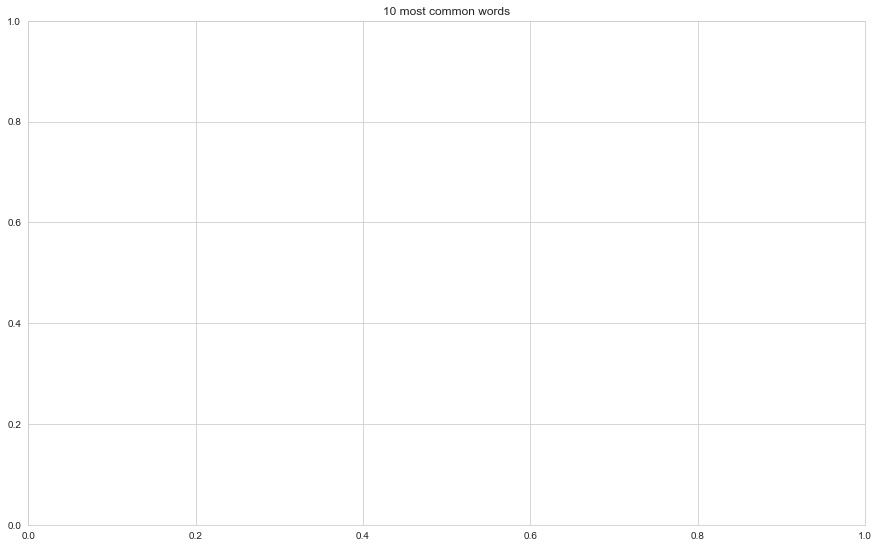

In [21]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=['like','stars','people','experience','let','english','however','then','stuff','only','or','very','than','also','singapore','could','would','an','asked','one','enough','u','just','has','on','were','hobby','thing','that','here','then','when','their','there','need','store','products','cars','all','rc','models','it','car','model','product','with','is','as','was','what','be','other','have','this','a','in','no','too','you','the','my', 'they', 'if', 'at', 'me', 'your', 'of', 'are', 'for', 'can', 'shop', 'not', 'i', 'get', 'but', 'to', 'and', 'from', 'tamiya', 'item', 'place', 'paint', 'really', 'quite', 'come', 'got', 'will', 'staff', 'even', 'still', 'play', 'tell', 'got', 'absolutely'])

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(reviews_cleaned['Review Text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
# Load the regular expression library
import re

# Remove punctuation
reviews_cleaned['reviews_cleaned_text_processed'] = \
reviews_cleaned['reviewBody'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
reviews_cleaned['reviews_cleaned_text_processed'] = \
reviews_cleaned['reviews_cleaned_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
reviews_cleaned['reviews_cleaned_text_processed'].head()

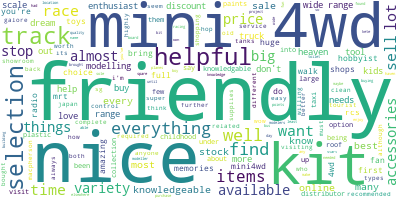

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(reviews_cleaned['reviews_cleaned_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(stopwords=['great', 'good', 'recommend','staffs','parts','kits','like','stars','people','experience','let','english', 'however','then','stuff','only','or','very','than','also','singapore','could','would','an','asked','one','enough','u','just','has','on','were','hobby','thing','that','here','then','when','their','there','need','store','products','cars','all','rc','models','it','car','model','product','with','is','as','was','what','be','other','have','this','a','in','no','too','you','the','my', 'they', 'if', 'at', 'me', 'your', 'of', 'are', 'for', 'can', 'shop', 'not', 'i', 'get', 'but', 'to', 'and', 'from', 'tamiya', 'item', 'place', 'paint', 'really', 'quite', 'come', 'got', 'will', 'staff', 'even', 'still', 'play', 'tell', 'got', 'absolutely'],background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [10]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['like','stars','people','experience','let','english', 'however','then','stuff','only','or','very','than','also','singapore','could','would','an','asked','one','enough','u','just','has','on','were','hobby','thing','that','here','then','when','their','there','need','store','products','cars','all','rc','models','it','car','model','product','with','is','as','was','what','be','other','have','this','a','in','no','too','you','the','my', 'they', 'if', 'at', 'me', 'your', 'of', 'are', 'for', 'can', 'shop', 'not', 'i', 'get', 'but', 'to', 'and', 'from', 'tamiya', 'item', 'place', 'paint', 'really', 'quite', 'come', 'got', 'will', 'staff', 'even', 'still', 'play', 'tell', 'got', 'absolutely'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = reviews_cleaned.reviews_cleaned_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['full', 'items']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alext\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1)]


In [12]:
from pprint import pprint
# number of topics
num_topics = 2
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.023*"great" + 0.016*"good" + 0.010*"friendly" + 0.009*"wd" + 0.009*"nice" '
  '+ 0.008*"selection" + 0.008*"mini" + 0.008*"track" + 0.007*"kits" + '
  '0.007*"best"'),
 (1,
  '0.018*"wd" + 0.017*"mini" + 0.016*"good" + 0.015*"friendly" + 0.014*"parts" '
  '+ 0.012*"great" + 0.012*"nice" + 0.011*"helpful" + 0.011*"kit" + '
  '0.009*"kits"')]


In [13]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, R=5)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\alext\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
C:\Users\alext\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool

C:\Users\alext\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
C:\Users\alext\anaconda3\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.018471  0.0       1        1  55.665217
0     -0.018471  0.0       2        1  44.334783, topic_info=            Term       Freq      Total Category  logprob  loglift
20         great  14.000000  14.000000  Default   5.0000   5.0000
340         best   3.000000   3.000000  Default   4.0000   4.0000
27      memories   2.000000   2.000000  Default   3.0000   3.0000
22         parts   8.000000   8.000000  Default   2.0000   2.0000
16         price   3.000000   3.000000  Default   1.0000   1.0000
430        enjoy   1.634307   2.010865   Topic1  -5.7074   0.3785
258        tools   2.149982   2.678851   Topic1  -5.4332   0.3659
105         huge   2.117864   2.676360   Topic1  -5.4482   0.3518
305       paints   2.095178   2.674583   Topic1  -5.4590   0.3417
254       racing   1.566818   2.005602   Topic1  -5.7496   0.3389
22         parts   6.752118   8.687766   Topic1  -4.2888   0.3338
103      helpful   5.656582   7.346714   Topic1  -4.4658   0.3244
352         many   3.108340   4.009160   Topic1  -5.0646   0.3313
5           mini   8.131009  11.306435   Topic1  -4.1030   0.2561
7             wd   8.920527  12.623563   Topic1  -4.0103   0.2386
261         wide   3.562049   4.672312   Topic1  -4.9283   0.3145
12           kit   5.238870   7.314101   Topic1  -4.5425   0.2521
91      friendly   7.171263  11.231406   Topic1  -4.2286   0.1372
3           good   8.050496  14.438746   Topic1  -4.1129   0.0016
97       control   1.461821   1.918936   Topic2  -5.5914   0.5413
27      memories   1.948839   2.558597   Topic2  -5.3038   0.5412
340         best   2.915341   3.838518   Topic2  -4.9011   0.5383
234     modelers   1.347069   1.928663   Topic2  -5.6731   0.4545
227      quality   1.345073   1.928833   Topic2  -5.6746   0.4529
16         price   2.232089   3.215522   Topic2  -5.1681   0.4483
232  distributor   1.784946   2.572472   Topic2  -5.3917   0.4479
20         great   9.136076  14.886790   Topic2  -3.7588   0.3252
3           good   6.388250  14.438746   Topic2  -4.1166  -0.0021
109    selection   3.219248   6.536406   Topic2  -4.8019   0.1052
91      friendly   4.060143  11.231406   Topic2  -4.5698  -0.2041
8           nice   3.559560   9.231060   Topic2  -4.7014  -0.1395
7             wd   3.703036  12.623563   Topic2  -4.6619  -0.4130, token_table=      Topic      Freq         Term
term                              
340       1  0.260517         best
340       2  0.781552         best
97        2  0.521122      control
232       1  0.388731  distributor
232       2  0.777462  distributor
430       1  0.994597        enjoy
91        1  0.623252     friendly
91        2  0.356144     friendly
3         1  0.554065         good
3         2  0.415549         good
20        1  0.403042        great
20        2  0.604563        great
103       1  0.816692      helpful
103       2  0.272231      helpful
105       1  0.747284         huge
105       2  0.373642         huge
12        1  0.683611          kit
12        2  0.273444          kit
352       1  0.748286         many
352       2  0.249429         many
27        1  0.390839     memories
27        2  0.781679     memories
5         1  0.707562         mini
5         2  0.265336         mini
234       1  0.518494     modelers
234       2  0.518494     modelers
8         1  0.649980         nice
8         2  0.433320         nice
305       1  0.747780       paints
305       2  0.373890       paints
22        1  0.805731        parts
22        2  0.230209        parts
16        1  0.310991        price
16        2  0.621983        price
227       1  0.518448      quality
227       2  0.518448      quality
254       1  0.997207       racing
109       1  0.458968    selection
109       2  0.458968    selection
258       1  0.746589        tools
258       2  0.373294        tools
7         1  0.712952           wd
7         2  0.316868         